# Imports

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import geopy as gp
from geopy import Nominatim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn import metrics
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from collections import Counter

# All Franchises

In [0]:
df = pd.read_pickle('/content/drive/My Drive/pr5_df.pickle')
df

,address,state,zip,lat_long,lat,long,tract
0,"75 MIDDLESEX TPKE, BURLINGTON, MA, 01803",massachusetts,01803,"42.48254195, -71.21352621256094",42.48254195,-71.21352621,3324
1,"40 HARRISON AVE, BOSTON, MA, 02111",massachusetts,02111,"42.351791537621445, -71.06106430632713",42.35179154,-71.06106431,701.03
2,"100 CAMBRIDGESIDE PL, CAMBRIDGE, MA, 02141",massachusetts,02141,"42.3670669, -71.0764049",42.3670669,-71.0764049,3521.02
3,"154 HARVARD AVE, ALLSTON, MA, 02134",massachusetts,02134,"42.35184841916945, -71.1316340686077",42.35184842,-71.13163407,7.03
4,"396 GEORGE ST, NEW BRUNSWICK, NJ, 08901",new jersey,08901,"40.4964392, -74.4442466",40.4964392,-74.4442466,93
5,"\t1199 AMBOY AVE, EDISON, NJ, 08837",new jersey,08837,"40.535366, -74.346237",40.535366,-74.346237,19.03
6,"867 US 1, EDISON, NJ, 08817",new jersey,08817,"40.5015129, -74.4037215",40.5015129,-74.4037215,18.04
7,"1 GARDEN STATE PLZ, PARAMUS, NJ, 07652",new jersey,07652,"40.918344, -74.076072",40.918344,-74.076072,425
8,"343 BLOOMFIELD AVE, MONTCLAIR, NJ, 07042",new jersey,07042,"40.812114, -74.213969",40.812114,-74.213969,168
9,"527 WASHINGTON ST, HOBOKEN, NJ, 07030",new jersey,07030,"40.7430352, -74.0290045",40.7430352,-74.0290045,187.01


# Texas Only

In [0]:
# df = pd.read_csv('/content/drive/My Drive/gong_cha_df.csv', dtype=str)

In [0]:
# gong_cha_tx_df = pd.read_pickle('/content/drive/My Drive/texas_df.pickle')

In [0]:
# df

In [0]:
# df = df.sort_values(by=['state']).reset_index(drop=True)

In [0]:
# df.to_pickle('/content/drive/My Drive/pr5_df.pickle')

In [0]:
# gong_cha_tx_df = df.iloc[34:47]

In [0]:
# gong_cha_tx_df = texas_df.reset_index(drop=True)

In [0]:
# gong_cha_tx_df['boba_shop'] = 1

In [0]:
# gong_cha_tx_df

In [0]:
# tx_acs = pd.read_csv('/content/drive/My Drive/proj5/tx_df.csv')

In [0]:
# tx_acs.shape

In [0]:
# tx_acs.dtypes

In [0]:
# tx_acs.head()

In [0]:
# # Filter out percent estimate "PE" features
# PE = [col for col in tx_acs if col.endswith('PE')]
# PM = [col for col in tx_acs if col.endswith('PM')]

In [0]:
# PE[:10]

In [0]:
# tx_acs = tx_acs.drop(columns = PE)

In [0]:
# tx_acs.columns

In [0]:
# tx_acs.iloc[:,2:]

# New York Only

In [0]:
# ny_df = pd.read_csv('/content/drive/My Drive/ny_demo.csv')
# # ny_df = pd.read_pickle('/content/drive/My Drive/ny_df.pickle')

In [0]:
# ny_df

In [0]:
# ny_df.columns

In [0]:
# ny_df = ny_df.dropna(axis=0)

In [0]:
# ny_df['tract'] = ny_df['tract'].astype(str)

In [0]:
# ny_df.dtypes

In [0]:
# ny_df = ny_df.dropna(axis=1)

In [0]:
# ny_df['boba_shop'].replace({'#REF!': 1}, inplace=True)

In [0]:
# ny_df = ny_df.drop(columns=['state'])

In [0]:
# ny_df.iloc[:,3:]

In [0]:
# ny_df.to_pickle('/content/drive/My Drive/ny_df.pickle')

# Postgres

In [0]:
import sqlalchemy as sqla
from sqlalchemy import *
dbpasswd = 'pwd'
# dbpasswd = os.environ.get("dbpwd")

In [0]:
def conn_details(db, user, host, port, passwd):
    url = 'postgresql://{user}:{passwd}@{host}:{port}/{db}'.format(user=user, passwd=passwd, host=host, port=port, db=db)
    return url

In [0]:
conn_details('acs', 'ubuntu', 'ip', 'port', dbpasswd)

In [0]:
engine = sqla.create_engine(conn_details('acs', 'ubuntu', 'ip', 'port', dbpasswd))

In [0]:
query = 'select * from defs limit 10'

In [0]:
code2def = pd.read_sql(query, con=engine)

In [0]:
code2def.head(5)

,id,def
0,DP04_0001E,"Estimate, HOUSING OCCUPANCY, Total housing units"
1,DP04_0001M,"Margin of Error, HOUSING OCCUPANCY, Total hous..."
2,DP04_0001PE,"Percent Estimate, HOUSING OCCUPANCY, Total hou..."
3,DP04_0001PM,"Percent Margin of Error, HOUSING OCCUPANCY, To..."
4,DP04_0002E,"Estimate, HOUSING OCCUPANCY, Total housing uni..."


# New York & Census tracts within 1-3 mi of current locations

In [0]:
# # Demographics
# demo_q = """select * from demo where tract in ('76', '84', '92', '118', '125', '138', '195', '404', '444', '456', '458', '484', '504', '516', '11', '49', '76', '84', '92', '104', '118', '120', '138', '195', '404', '444', '452', '454', '456', '458', '464', '468', '470', '472', '476', '478', '480', '482', '484', '492', '496', '500', '502.02', '504', '506', '512', '518', '520', '532', '538', '542', '548', '552', '554', '556', '558', '560', '562', '564', '566', '568', '580', '582', '590', '592', '598', '774', '3001', '3003', '3004', '3005', '3006', '3007', '3009', '3012', '3015', '3016', '3017', '3018', '3019', '3021.02', '3022', '3023', '3024', '3025.01', '3025.02', '3026', '3027', '3028', '3029', '3030', '3031.01', '3031.02', '3032.01', '3032.02', '3033.01', '3033.02', '3034', '3035', '3036', '3037', '3038', '3039', '3040.01', '3040.02', '3041', '3042.02', '3042.03', '3042.04', '4043', '4044', '4045', '4046', '4047', '4048', '4049.01', '4049.02', '4053.01', '4053.02', '4055', '4056', '4058', '4059', '4060.01', '4060.02', '4061', '4062.01', '4062.02', '4063', '4064', '4065.01', '4066', '4067.01', '4067.02', '4068.01', '4068.02', '4069', '4070', '4071.01', '4071.02', '4072.01', '4072.03', '4072.04', '4073.01', '4073.02', '4074.01', '4074.02', '4075.01', '4075.02', '4076', '4077', '4078.01', '4078.02', '4079', '4080', '4081', '4082', '4083', '4084', '4085', '4086', '4087', '4088', '4089', '4091', '4092', '4093', '4096', '4125', '4126', '4127', '4128', '4129', '4135', '4139', '4140.01', '4140.02', '4141', '4142.01', '4142.02',
# '4146', '4147', '4148', '4149', '4150', '5185.01', '5189', '5190', '5191', '5192', '5193', '9801', '9821', '8', '15.02', '49', '76', '84', '92', '104') and county in ('Kings County', 'New York County', 'Queens County', 'Nassau County')"""
# ny_demo = pd.read_sql(demo_q, con=engine)

# # Economics
# eco_q = """select * from eco where tract in ('76', '84', '92', '118', '125', '138', '195', '404', '444', '456', '458', '484', '504', '516', '11', '49', '76', '84', '92', '104', '118', '120', '138', '195', '404', '444', '452', '454', '456', '458', '464', '468', '470', '472', '476', '478', '480', '482', '484', '492', '496', '500', '502.02', '504', '506', '512', '518', '520', '532', '538', '542', '548', '552', '554', '556', '558', '560', '562', '564', '566', '568', '580', '582', '590', '592', '598', '774', '3001', '3003', '3004', '3005', '3006', '3007', '3009', '3012', '3015', '3016', '3017', '3018', '3019', '3021.02', '3022', '3023', '3024', '3025.01', '3025.02', '3026', '3027', '3028', '3029', '3030', '3031.01', '3031.02', '3032.01', '3032.02', '3033.01', '3033.02', '3034', '3035', '3036', '3037', '3038', '3039', '3040.01', '3040.02', '3041', '3042.02', '3042.03', '3042.04', '4043', '4044', '4045', '4046', '4047', '4048', '4049.01', '4049.02', '4053.01', '4053.02', '4055', '4056', '4058', '4059', '4060.01', '4060.02', '4061', '4062.01', '4062.02', '4063', '4064', '4065.01', '4066', '4067.01', '4067.02', '4068.01', '4068.02', '4069', '4070', '4071.01', '4071.02', '4072.01', '4072.03', '4072.04', '4073.01', '4073.02', '4074.01', '4074.02', '4075.01', '4075.02', '4076', '4077', '4078.01', '4078.02', '4079', '4080', '4081', '4082', '4083', '4084', '4085', '4086', '4087', '4088', '4089', '4091', '4092', '4093', '4096', '4125', '4126', '4127', '4128', '4129', '4135', '4139', '4140.01', '4140.02', '4141', '4142.01', '4142.02',
# '4146', '4147', '4148', '4149', '4150', '5185.01', '5189', '5190', '5191', '5192', '5193', '9801', '9821', '8', '15.02', '49', '76', '84', '92', '104') and county in ('Kings County', 'New York County', 'Queens County', 'Nassau County')"""
# ny_eco = pd.read_sql(eco_q, con=engine)

# # Housing
# house_q = """select * from housing where tract in ('76', '84', '92', '118', '125', '138', '195', '404', '444', '456', '458', '484', '504', '516', '11', '49', '76', '84', '92', '104', '118', '120', '138', '195', '404', '444', '452', '454', '456', '458', '464', '468', '470', '472', '476', '478', '480', '482', '484', '492', '496', '500', '502.02', '504', '506', '512', '518', '520', '532', '538', '542', '548', '552', '554', '556', '558', '560', '562', '564', '566', '568', '580', '582', '590', '592', '598', '774', '3001', '3003', '3004', '3005', '3006', '3007', '3009', '3012', '3015', '3016', '3017', '3018', '3019', '3021.02', '3022', '3023', '3024', '3025.01', '3025.02', '3026', '3027', '3028', '3029', '3030', '3031.01', '3031.02', '3032.01', '3032.02', '3033.01', '3033.02', '3034', '3035', '3036', '3037', '3038', '3039', '3040.01', '3040.02', '3041', '3042.02', '3042.03', '3042.04', '4043', '4044', '4045', '4046', '4047', '4048', '4049.01', '4049.02', '4053.01', '4053.02', '4055', '4056', '4058', '4059', '4060.01', '4060.02', '4061', '4062.01', '4062.02', '4063', '4064', '4065.01', '4066', '4067.01', '4067.02', '4068.01', '4068.02', '4069', '4070', '4071.01', '4071.02', '4072.01', '4072.03', '4072.04', '4073.01', '4073.02', '4074.01', '4074.02', '4075.01', '4075.02', '4076', '4077', '4078.01', '4078.02', '4079', '4080', '4081', '4082', '4083', '4084', '4085', '4086', '4087', '4088', '4089', '4091', '4092', '4093', '4096', '4125', '4126', '4127', '4128', '4129', '4135', '4139', '4140.01', '4140.02', '4141', '4142.01', '4142.02',
# '4146', '4147', '4148', '4149', '4150', '5185.01', '5189', '5190', '5191', '5192', '5193', '9801', '9821', '8', '15.02', '49', '76', '84', '92', '104') and county in ('Kings County', 'New York County', 'Queens County', 'Nassau County')"""
# ny_house = pd.read_sql(house_q, con=engine)

# # Social
# soc_q = """select * from social where tract in ('76', '84', '92', '118', '125', '138', '195', '404', '444', '456', '458', '484', '504', '516', '11', '49', '76', '84', '92', '104', '118', '120', '138', '195', '404', '444', '452', '454', '456', '458', '464', '468', '470', '472', '476', '478', '480', '482', '484', '492', '496', '500', '502.02', '504', '506', '512', '518', '520', '532', '538', '542', '548', '552', '554', '556', '558', '560', '562', '564', '566', '568', '580', '582', '590', '592', '598', '774', '3001', '3003', '3004', '3005', '3006', '3007', '3009', '3012', '3015', '3016', '3017', '3018', '3019', '3021.02', '3022', '3023', '3024', '3025.01', '3025.02', '3026', '3027', '3028', '3029', '3030', '3031.01', '3031.02', '3032.01', '3032.02', '3033.01', '3033.02', '3034', '3035', '3036', '3037', '3038', '3039', '3040.01', '3040.02', '3041', '3042.02', '3042.03', '3042.04', '4043', '4044', '4045', '4046', '4047', '4048', '4049.01', '4049.02', '4053.01', '4053.02', '4055', '4056', '4058', '4059', '4060.01', '4060.02', '4061', '4062.01', '4062.02', '4063', '4064', '4065.01', '4066', '4067.01', '4067.02', '4068.01', '4068.02', '4069', '4070', '4071.01', '4071.02', '4072.01', '4072.03', '4072.04', '4073.01', '4073.02', '4074.01', '4074.02', '4075.01', '4075.02', '4076', '4077', '4078.01', '4078.02', '4079', '4080', '4081', '4082', '4083', '4084', '4085', '4086', '4087', '4088', '4089', '4091', '4092', '4093', '4096', '4125', '4126', '4127', '4128', '4129', '4135', '4139', '4140.01', '4140.02', '4141', '4142.01', '4142.02',
# '4146', '4147', '4148', '4149', '4150', '5185.01', '5189', '5190', '5191', '5192', '5193', '9801', '9821', '8', '15.02', '49', '76', '84', '92', '104') and county in ('Kings County', 'New York County', 'Queens County', 'Nassau County')"""
# ny_soc = pd.read_sql(soc_q, con=engine)

In [0]:
# Demographics
demo_q = """select * from demo where tract in ('76', '49', '29.02', '92', '84', '125', '195', '8', '15.02', '120', '19.02', '11', '774', '104', '554', '853', '853', '871', '1479', '683', '717.02', '4073.01', '3003', '3004', '3005', '3006', '3007', '3009', '3018', '3034', '3035', '3036', '3037', '3038', '3039', '3040.01', '3040.02', '3041', '3042.02', '3042.03', '3042.04', '4064', '4065.01', '4066', '4067.01', '4067.02', '4068.01', '4068.02', '4069', '4070', '4071.01', '4071.02', '4072.01', '4072.03', '4072.04', '4073.02', '4074.01', '4074.02', '4075.01', '4075.02', '4076', '4077', '4078.01', '4078.02', '4079', '4080', '4081', '4082', '9801', '1085', '1093', '1097', '1099', '1113', '1123', '1129', '1133', '1139', '1141', '1175', '1181', '1283', '1291.02', '1291.03', '1291.04', '1301', '1347', '1367', '1377', '1385.01', '1385.02', '1399', '1403', '1409.01', '1409.02', '1429', '1435', '1441', '1447', '1451.01', '1451.02', '1459', '1463', '1467', '1471', '1529.01', '1529.02', '1551.01', '1551.02', '1567', '1571.01', '1571.02', '1579.01', '1579.02', '1621') and county in ('Kings County', 'New York County', 'Queens County', 'Nassau County')"""
ny_demo = pd.read_sql(demo_q, con=engine)

# Economics
eco_q = """select * from eco where tract in ('76', '49', '29.02', '92', '84', '125', '195', '8', '15.02', '120', '19.02', '11', '774', '104', '554', '853', '853', '871', '1479', '683', '717.02', '4073.01', '3003', '3004', '3005', '3006', '3007', '3009', '3018', '3034', '3035', '3036', '3037', '3038', '3039', '3040.01', '3040.02', '3041', '3042.02', '3042.03', '3042.04', '4064', '4065.01', '4066', '4067.01', '4067.02', '4068.01', '4068.02', '4069', '4070', '4071.01', '4071.02', '4072.01', '4072.03', '4072.04', '4073.02', '4074.01', '4074.02', '4075.01', '4075.02', '4076', '4077', '4078.01', '4078.02', '4079', '4080', '4081', '4082', '9801', '1085', '1093', '1097', '1099', '1113', '1123', '1129', '1133', '1139', '1141', '1175', '1181', '1283', '1291.02', '1291.03', '1291.04', '1301', '1347', '1367', '1377', '1385.01', '1385.02', '1399', '1403', '1409.01', '1409.02', '1429', '1435', '1441', '1447', '1451.01', '1451.02', '1459', '1463', '1467', '1471', '1529.01', '1529.02', '1551.01', '1551.02', '1567', '1571.01', '1571.02', '1579.01', '1579.02', '1621') and county in ('Kings County', 'New York County', 'Queens County', 'Nassau County')"""
ny_eco = pd.read_sql(eco_q, con=engine)

# Housing
house_q = """select * from housing where tract in ('76', '49', '29.02', '92', '84', '125', '195', '8', '15.02', '120', '19.02', '11', '774', '104', '554', '853', '853', '871', '1479', '683', '717.02', '4073.01', '3003', '3004', '3005', '3006', '3007', '3009', '3018', '3034', '3035', '3036', '3037', '3038', '3039', '3040.01', '3040.02', '3041', '3042.02', '3042.03', '3042.04', '4064', '4065.01', '4066', '4067.01', '4067.02', '4068.01', '4068.02', '4069', '4070', '4071.01', '4071.02', '4072.01', '4072.03', '4072.04', '4073.02', '4074.01', '4074.02', '4075.01', '4075.02', '4076', '4077', '4078.01', '4078.02', '4079', '4080', '4081', '4082', '9801', '1085', '1093', '1097', '1099', '1113', '1123', '1129', '1133', '1139', '1141', '1175', '1181', '1283', '1291.02', '1291.03', '1291.04', '1301', '1347', '1367', '1377', '1385.01', '1385.02', '1399', '1403', '1409.01', '1409.02', '1429', '1435', '1441', '1447', '1451.01', '1451.02', '1459', '1463', '1467', '1471', '1529.01', '1529.02', '1551.01', '1551.02', '1567', '1571.01', '1571.02', '1579.01', '1579.02', '1621') and county in ('Kings County', 'New York County', 'Queens County', 'Nassau County')"""
ny_house = pd.read_sql(house_q, con=engine)

# Social
soc_q = """select * from social where tract in ('76', '49', '29.02', '92', '84', '125', '195', '8', '15.02', '120', '19.02', '11', '774', '104', '554', '853', '853', '871', '1479', '683', '717.02', '4073.01', '3003', '3004', '3005', '3006', '3007', '3009', '3018', '3034', '3035', '3036', '3037', '3038', '3039', '3040.01', '3040.02', '3041', '3042.02', '3042.03', '3042.04', '4064', '4065.01', '4066', '4067.01', '4067.02', '4068.01', '4068.02', '4069', '4070', '4071.01', '4071.02', '4072.01', '4072.03', '4072.04', '4073.02', '4074.01', '4074.02', '4075.01', '4075.02', '4076', '4077', '4078.01', '4078.02', '4079', '4080', '4081', '4082', '9801', '1085', '1093', '1097', '1099', '1113', '1123', '1129', '1133', '1139', '1141', '1175', '1181', '1283', '1291.02', '1291.03', '1291.04', '1301', '1347', '1367', '1377', '1385.01', '1385.02', '1399', '1403', '1409.01', '1409.02', '1429', '1435', '1441', '1447', '1451.01', '1451.02', '1459', '1463', '1467', '1471', '1529.01', '1529.02', '1551.01', '1551.02', '1567', '1571.01', '1571.02', '1579.01', '1579.02', '1621') and county in ('Kings County', 'New York County', 'Queens County', 'Nassau County')"""
ny_soc = pd.read_sql(soc_q, con=engine)

In [0]:
print(ny_demo.shape, ny_eco.shape, ny_house.shape, ny_soc.shape)

(124, 342) (124, 460) (124, 530) (124, 573)


In [0]:
# ny_df = ny_demo.merge(ny_eco,on='geo_id').merge(ny_house,on='geo_id').merge(ny_soc,on='geo_id')

In [0]:
ny_df = pd.merge(ny_demo, ny_eco, how='left', on=['geo_id', 'tract', 'county'])
ny_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Columns: 799 entries, geo_id to dp03_0137pm
dtypes: float64(796), object(3)
memory usage: 775.0+ KB


In [0]:
ny_df = pd.merge(ny_df, ny_house, how='left', on=['geo_id', 'tract', 'county'])
ny_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Columns: 1326 entries, geo_id to dp04_0143m
dtypes: float64(1323), object(3)
memory usage: 1.3+ MB


In [0]:
ny_df = pd.merge(ny_df, ny_soc, how='left', on=['geo_id', 'tract', 'county'])
ny_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Columns: 1896 entries, geo_id to dp02_0152pm
dtypes: float64(1893), object(3)
memory usage: 1.8+ MB


In [0]:
# list(ny_df.columns)

In [0]:
# pm = [col for col in ny_df if col.endswith('pm')]
# m = [col for col in ny_df if col.endswith('m')]
# e = [col for col in ny_df if col.endswith('e')]
pe = [col for col in ny_df if col.endswith('pe')]

ny_df = ny_df.drop(columns = pe)

In [0]:
ny_df['boba_shop'] = 0

In [0]:
current_franchises = ['76', '49', '29.02', '92', '84', '125', '195', '8', '15.02', '120', '19.02', '11', '774', '104', '554', '853', '853', '871', '1479', '683', '717.02', '4073.01']

In [0]:
ny_df.loc[ny_df.tract.isin(current_franchises), 'boba_shop'] = 1

In [0]:
Counter(ny_df['boba_shop'])

Counter({0: 93, 1: 31})

In [0]:
# ny_df.to_pickle('/content/drive/My Drive/ny_df_shortlisted_w_tracts.pickle')
# ny_df = pd.read_pickle('/content/drive/My Drive/ny_df_shortlisted_w_tracts.pickle')

In [0]:
cols = ny_df.columns.to_list()
cols.insert(0, cols.pop(cols.index('boba_shop')))
ny_df = ny_df.reindex(columns = cols)

In [0]:
ny_df.head()

,boba_shop,geo_id,tract,county,dp05_0031pm,dp05_0032e,dp05_0032m,dp05_0033e,dp05_0033m,dp05_0034e,dp05_0034m,dp05_0034pm,dp05_0035e,dp05_0035m,dp05_0035pm,dp05_0036e,dp05_0036m,dp05_0036pm,dp05_0037e,dp05_0037m,dp05_0037pm,dp05_0038e,dp05_0038m,dp05_0038pm,dp05_0039e,dp05_0039m,dp05_0039pm,dp05_0040e,dp05_0040m,dp05_0040pm,dp05_0041e,dp05_0041m,dp05_0041pm,dp05_0042e,dp05_0042m,dp05_0042pm,dp05_0043e,dp05_0043m,dp05_0043pm,dp05_0044e,...,dp02_0139m,dp02_0139pm,dp02_0140e,dp02_0140m,dp02_0140pm,dp02_0141e,dp02_0141m,dp02_0141pm,dp02_0142e,dp02_0142m,dp02_0142pm,dp02_0143e,dp02_0143m,dp02_0143pm,dp02_0144e,dp02_0144m,dp02_0144pm,dp02_0145e,dp02_0145m,dp02_0145pm,dp02_0146e,dp02_0146m,dp02_0146pm,dp02_0147e,dp02_0147m,dp02_0147pm,dp02_0148e,dp02_0148m,dp02_0148pm,dp02_0149e,dp02_0149m,dp02_0149pm,dp02_0150e,dp02_0150m,dp02_0151e,dp02_0151m,dp02_0151pm,dp02_0152e,dp02_0152m,dp02_0152pm
0,1,1400000US36047001100,11,Kings County,58.1,166.7,643.1,1359.0,102.0,1288.0,112.0,3.3,71.0,44.0,3.3,1288.0,112.0,3.3,1004.0,130.0,6.6,72.0,39.0,2.9,0.0,12.0,2.4,0.0,12.0,2.4,0.0,12.0,2.4,0.0,12.0,2.4,0.0,12.0,2.4,185.0,...,12.0,2.4,47.0,26.0,1.9,21.0,19.0,1.4,37.0,39.0,2.9,0.0,12.0,2.4,31.0,27.0,2.0,11.0,12.0,0.9,0.0,12.0,2.4,36.0,24.0,1.8,0.0,12.0,2.4,48.0,34.0,2.5,757.0,40.0,757.0,40.0,4.2,745.0,42.0,1.8
1,1,1400000US36047004900,49,Kings County,10.5,55.3,25.1,2718.0,292.0,2507.0,303.0,4.1,211.0,110.0,4.1,2507.0,303.0,4.1,1793.0,257.0,7.4,392.0,190.0,6.3,0.0,12.0,1.2,0.0,12.0,1.2,0.0,12.0,1.2,0.0,12.0,1.2,0.0,12.0,1.2,256.0,...,12.0,1.2,79.0,62.0,2.2,0.0,12.0,1.2,28.0,25.0,0.9,32.0,47.0,1.7,62.0,96.0,3.5,37.0,35.0,1.3,31.0,46.0,1.7,16.0,17.0,0.6,38.0,49.0,1.8,91.0,98.0,3.5,997.0,81.0,980.0,83.0,1.9,972.0,84.0,2.3
2,1,1400000US36047007600,76,Kings County,9.8,89.8,36.3,5146.0,682.0,4688.0,587.0,10.3,458.0,562.0,10.3,4688.0,587.0,10.3,2194.0,518.0,10.5,122.0,85.0,1.6,0.0,17.0,0.6,0.0,17.0,0.6,0.0,17.0,0.6,0.0,17.0,0.6,0.0,17.0,0.6,867.0,...,17.0,0.6,30.0,47.0,0.9,35.0,39.0,0.8,0.0,17.0,0.6,0.0,17.0,0.6,21.0,34.0,0.7,17.0,27.0,0.5,0.0,17.0,0.6,9.0,13.0,0.3,5.0,8.0,0.2,33.0,41.0,0.8,1402.0,91.0,1165.0,108.0,5.7,936.0,117.0,8.3
3,1,1400000US36047008400,84,Kings County,13.4,73.8,43.3,3879.0,504.0,3731.0,537.0,3.0,148.0,110.0,3.0,3731.0,537.0,3.0,1817.0,513.0,12.1,117.0,102.0,2.6,0.0,12.0,0.8,0.0,12.0,0.8,0.0,12.0,0.8,0.0,12.0,0.8,0.0,12.0,0.8,219.0,...,12.0,0.8,0.0,12.0,0.8,9.0,14.0,0.4,49.0,41.0,1.1,0.0,12.0,0.8,0.0,12.0,0.8,19.0,20.0,0.5,0.0,12.0,0.8,9.0,14.0,0.4,0.0,12.0,0.8,61.0,75.0,2.0,1156.0,74.0,960.0,97.0,7.2,885.0,111.0,8.7
4,1,1400000US36047009200,92,Kings County,10.0,104.9,43.0,5668.0,472.0,5578.0,486.0,1.5,90.0,83.0,1.5,5578.0,486.0,1.5,1478.0,421.0,7.0,226.0,151.0,2.7,0.0,17.0,0.6,0.0,17.0,0.6,0.0,17.0,0.6,0.0,17.0,0.6,0.0,17.0,0.6,2673.0,...,17.0,0.6,46.0,69.0,1.2,26.0,41.0,0.7,0.0,17.0,0.6,0.0,17.0,0.6,21.0,23.0,0.4,8.0,13.0,0.2,0.0,17.0,0.6,0.0,17.0,0.6,8.0,14.0,0.2,13.0,20.0,0.4,1698.0,64.0,1541.0,89.0,4.4,1485.0,96.0,5.1


In [0]:
base = ny_df.iloc[:,:4]

In [0]:
e_only  = ny_df.loc[:, ny_df.columns.str.endswith('e')]
# pe_only  = ny_df.loc[:, ny_df.columns.str.endswith('pe')]

In [0]:
ny_df = pd.concat([base, e_only],axis=1)
# ny_df = pd.concat([base, pe_only],axis=1)

In [0]:
ny_df.iloc[:,0]

0      1
1      1
2      1
3      1
4      1
      ..
119    0
120    0
121    0
122    0
123    0
Name: boba_shop, Length: 124, dtype: int64

# Modeling Prep

In [0]:
# ny_df = ny_df.set_index('tract')

In [0]:
ny_df.iloc[:,4:]

,dp05_0032e,dp05_0033e,dp05_0034e,dp05_0035e,dp05_0036e,dp05_0037e,dp05_0038e,dp05_0039e,dp05_0040e,dp05_0041e,dp05_0042e,dp05_0043e,dp05_0044e,dp05_0045e,dp05_0046e,dp05_0047e,dp05_0048e,dp05_0049e,dp05_0050e,dp05_0051e,dp05_0052e,dp05_0053e,dp05_0054e,dp05_0055e,dp05_0056e,dp05_0057e,dp05_0058e,dp05_0059e,dp05_0060e,dp05_0061e,dp05_0062e,dp05_0063e,dp05_0064e,dp05_0065e,dp05_0066e,dp05_0067e,dp05_0068e,dp05_0069e,dp05_0070e,dp05_0071e,...,dp02_0113e,dp02_0114e,dp02_0115e,dp02_0116e,dp02_0117e,dp02_0118e,dp02_0119e,dp02_0120e,dp02_0121e,dp02_0122e,dp02_0123e,dp02_0124e,dp02_0125e,dp02_0126e,dp02_0127e,dp02_0128e,dp02_0129e,dp02_0130e,dp02_0131e,dp02_0132e,dp02_0133e,dp02_0134e,dp02_0135e,dp02_0136e,dp02_0137e,dp02_0138e,dp02_0139e,dp02_0140e,dp02_0141e,dp02_0142e,dp02_0143e,dp02_0144e,dp02_0145e,dp02_0146e,dp02_0147e,dp02_0148e,dp02_0149e,dp02_0150e,dp02_0151e,dp02_0152e
0,166.7,1359.0,1288.0,71.0,1288.0,1004.0,72.0,0.0,0.0,0.0,0.0,0.0,185.0,47.0,49.0,3.0,0.0,41.0,12.0,33.0,0.0,0.0,0.0,0.0,0.0,27.0,71.0,17.0,0.0,29.0,0.0,1359.0,1075.0,95.0,0.0,220.0,0.0,46.0,1359.0,163.0,...,36.0,82.0,0.0,201.0,36.0,52.0,0.0,0.0,0.0,1359.0,91.0,0.0,10.0,0.0,0.0,101.0,93.0,18.0,101.0,24.0,11.0,147.0,59.0,0.0,39.0,40.0,0.0,47.0,21.0,37.0,0.0,31.0,11.0,0.0,36.0,0.0,48.0,757.0,757.0,745.0
1,55.3,2718.0,2507.0,211.0,2507.0,1793.0,392.0,0.0,0.0,0.0,0.0,0.0,256.0,99.0,96.0,8.0,10.0,26.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,66.0,211.0,8.0,87.0,100.0,0.0,2718.0,1996.0,408.0,87.0,356.0,0.0,82.0,2718.0,309.0,...,85.0,208.0,60.0,179.0,25.0,61.0,0.0,43.0,0.0,2718.0,158.0,8.0,0.0,8.0,107.0,301.0,64.0,0.0,192.0,13.0,8.0,211.0,224.0,0.0,35.0,51.0,0.0,79.0,0.0,28.0,32.0,62.0,37.0,31.0,16.0,38.0,91.0,997.0,980.0,972.0
2,89.8,5146.0,4688.0,458.0,4688.0,2194.0,122.0,0.0,0.0,0.0,0.0,0.0,867.0,0.0,718.0,81.0,32.0,0.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,1505.0,458.0,54.0,0.0,9.0,0.0,5146.0,2634.0,176.0,0.0,894.0,0.0,1900.0,5146.0,3365.0,...,2667.0,2868.0,2137.0,80.0,0.0,612.0,488.0,80.0,42.0,5146.0,17.0,50.0,0.0,12.0,0.0,33.0,21.0,0.0,114.0,0.0,0.0,226.0,78.0,0.0,15.0,25.0,0.0,30.0,35.0,0.0,0.0,21.0,17.0,0.0,9.0,5.0,33.0,1402.0,1165.0,936.0
3,73.8,3879.0,3731.0,148.0,3731.0,1817.0,117.0,0.0,0.0,0.0,0.0,0.0,219.0,19.0,127.0,0.0,9.0,0.0,9.0,55.0,0.0,0.0,0.0,0.0,0.0,1578.0,148.0,64.0,0.0,0.0,0.0,3879.0,1956.0,181.0,0.0,274.0,46.0,1616.0,3879.0,2824.0,...,1553.0,2518.0,1384.0,48.0,9.0,122.0,99.0,79.0,61.0,3879.0,10.0,88.0,9.0,0.0,0.0,132.0,15.0,9.0,60.0,8.0,0.0,109.0,123.0,0.0,19.0,52.0,0.0,0.0,9.0,49.0,0.0,0.0,19.0,0.0,9.0,0.0,61.0,1156.0,960.0,885.0
4,104.9,5668.0,5578.0,90.0,5578.0,1478.0,226.0,0.0,0.0,0.0,0.0,0.0,2673.0,158.0,2373.0,9.0,19.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,0.0,1201.0,90.0,37.0,0.0,9.0,0.0,5668.0,1533.0,263.0,13.0,2704.0,0.0,1245.0,5668.0,2229.0,...,2982.0,1839.0,930.0,368.0,220.0,2107.0,1782.0,59.0,50.0,5668.0,145.0,0.0,17.0,8.0,0.0,35.0,34.0,8.0,56.0,0.0,19.0,62.0,55.0,0.0,6.0,119.0,0.0,46.0,26.0,0.0,0.0,21.0,8.0,0.0,0.0,8.0,13.0,1698.0,1541.0,1485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,60.1,8458.0,8293.0,165.0,8293.0,2519.0,252.0,0.0,0.0,0.0,0.0,0.0,4989.0,2912.0,1090.0,188.0,46.0,108.0,0.0,645.0,0.0,0.0,0.0,0.0,0.0,533.0,165.0,32.0,0.0,41.0,0.0,8458.0,2592.0,298.0,18.0,5104.0,0.0,625.0,8458.0,1026.0,...,1960.0,913.0,189.0,2315.0,953.0,1472.0,818.0,27.0,0.0,8458.0,139.0,69.0,147.0,0.0,11.0,62.0,16.0,0.0,271.0,7.0,21.0,572.0,623.0,0.0,0.0,104.0,13.0,177.0,28.0,12.0,13.0,0.0,66.0,0.0,46.0,0.0,138.0,2518.0,2391.0,2272.0
120,82.9,2306.0,2274.0,32.0,2274.0,574.0,81.0,37.0,0.0,0.0,0.0,0.0,1433.0,898.0,57.0,171.0,0.0,33.0,0.0,274.0,0.0,0.0,0.0,0.0,0.0,149.0,32.0,4.0,0.0,0.0,0.0,2306.0,578.0,113.0,37.0,1450.0,0.0,160.0,2306.0,389.0,...,648.0,336.0,52.0,870.0,484.0,292.0,106.0,16.0

In [0]:
# Define X and y
y = ny_df.iloc[:,0]
X = ny_df.iloc[:,4:]

print(y.shape)
print(X.shape)

(124,)
(124, 501)


In [0]:
X.dtypes.unique()

array([dtype('float64')], dtype=object)

In [0]:
X.isnull().any().any()

False

In [0]:
Counter(y)

Counter({0: 93, 1: 31})

### Train/Test Split

In [0]:
# ny_df = ny_df.set_index('tract')

In [0]:
# ny_df = ny_df.reset_index()

In [0]:
indices = ny_df.index.values

In [0]:
len(indices)

124

In [0]:
# # train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=89, stratify=y)
X_train, X_test, indices_train, indices_test = train_test_split(X, indices, test_size=0.30, random_state=89, stratify=y)
y_train, y_test = y[indices_train],  y[indices_test]

In [0]:
# X_test

### Scale

In [0]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling

### Baseline Logistic Regression

In [0]:
# Baseline LR w/out under or over sampling
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
lr_scores = cross_validate(lr, X_train, y_train, cv=10, scoring=['accuracy', 'roc_auc'])
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)

In [0]:
lr_scores

{'fit_time': array([0.02314138, 0.02536559, 0.02816248, 0.02243352, 0.02595901,
        0.01665616, 0.02609491, 0.03716826, 0.01648545, 0.02858686]),
 'score_time': array([0.00510764, 0.00406766, 0.00409555, 0.00413895, 0.00453472,
        0.00421309, 0.00515127, 0.0052042 , 0.00406742, 0.00455403]),
 'test_accuracy': array([0.88888889, 0.77777778, 1.        , 0.88888889, 0.88888889,
        0.55555556, 0.75      , 0.75      , 0.75      , 0.75      ]),
 'test_roc_auc': array([0.5       , 1.        , 1.        , 0.57142857, 1.        ,
        0.72222222, 0.91666667, 0.83333333, 0.66666667, 0.83333333])}

In [0]:
print("Training:", lr.score(X_train, y_train))
print("Test set:", lr.score(X_test, y_test))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Training: 1.0
Test set: 0.8421052631578947
Accuracy: 0.8421052631578947
Precision: 0.7
Recall: 0.7


In [0]:
lr_cm = metrics.confusion_matrix(y_test, y_pred)
lr_cm

array([[25,  3],
       [ 3,  7]])

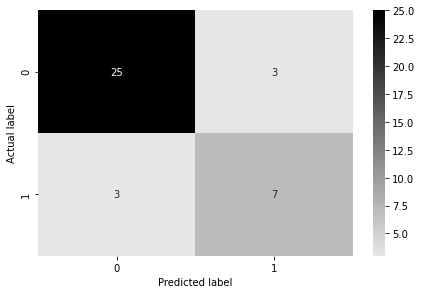

In [0]:
# name  of classes
class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
a = sns.heatmap(pd.DataFrame(lr_cm), annot=True, fmt='g', cmap=cmap)
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label',)
plt.show()

(array([22.,  2.,  2.,  0.,  2.,  0.,  1.,  0.,  0.,  9.]),
 array([7.00931662e-42, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

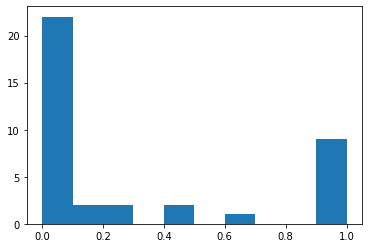

In [0]:
probs = lr.predict_proba(X_test)
prob_true = probs[::,1]
plt.hist(prob_true)

### Baseline Random Forest

In [0]:
# Baseline RF w/out under or over sampling
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_scores = cross_validate(rfc, X_train, y_train, cv=10, scoring=['accuracy', 'roc_auc'])
y_pred_rfc = rfc.predict(X_test)

In [0]:
rfc_scores

{'fit_time': array([0.15098524, 0.14715886, 0.16729784, 0.14909792, 0.15138459,
        0.14922929, 0.14653325, 0.14723253, 0.14326906, 0.14832497]),
 'score_time': array([0.01814127, 0.01844311, 0.02011418, 0.02283645, 0.01980877,
        0.018399  , 0.01956105, 0.01799917, 0.01883841, 0.0184052 ]),
 'test_accuracy': array([0.77777778, 0.88888889, 1.        , 1.        , 0.88888889,
        0.88888889, 1.        , 1.        , 0.875     , 1.        ]),
 'test_roc_auc': array([0.85714286, 1.        , 1.        , 1.        , 1.        ,
        0.86111111, 1.        , 1.        , 0.58333333, 1.        ])}

In [0]:
print("Training:", lr.score(X_train, y_train))
print("Test set:", lr.score(X_test, y_test))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rfc))
print("Precision:", metrics.precision_score(y_test, y_pred_rfc))
print("Recall:", metrics.recall_score(y_test, y_pred_rfc))

Training: 1.0
Test set: 0.8421052631578947
Accuracy: 0.9210526315789473
Precision: 1.0
Recall: 0.7


In [0]:
rfc_cm = metrics.confusion_matrix(y_test, y_pred_rfc)
rfc_cm

array([[28,  0],
       [ 3,  7]])

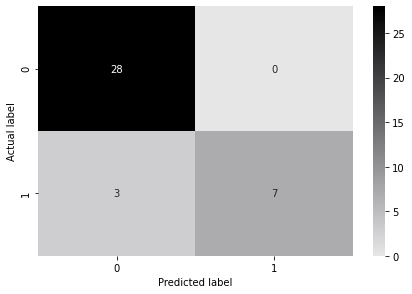

In [0]:
# name  of classes
class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
a = sns.heatmap(pd.DataFrame(rfc_cm), annot=True, fmt='g', cmap=cmap)
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label',)
plt.show()

(array([13.,  9.,  3.,  3.,  0.,  1.,  4.,  1.,  0.,  4.]),
 array([0.01 , 0.088, 0.166, 0.244, 0.322, 0.4  , 0.478, 0.556, 0.634,
        0.712, 0.79 ]),
 <a list of 10 Patch objects>)

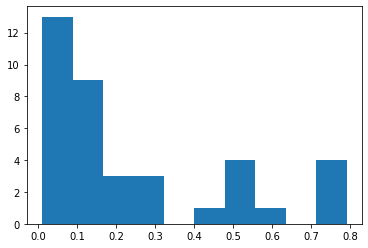

In [0]:
probs = rfc.predict_proba(X_test)
prob_true = probs[::,1]
plt.hist(prob_true)

### Undersampling

In [0]:
X_under, y_under = RandomUnderSampler(random_state=89).fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Oversampling

In [0]:
X_over, y_over = RandomOverSampler(random_state=89).fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
Counter(y)

Counter({0: 93, 1: 31})

In [0]:
Counter(y_over)

Counter({0: 65, 1: 65})

In [0]:
Counter(y_under)

Counter({0: 21, 1: 21})

### Logistic Regression (undersampled)


In [0]:
lr_under = LogisticRegression(solver='liblinear')
lr_under.fit(X_under, y_under)
lr_und_scores = cross_val_score(lr_under, X_under, y_under, cv=10, scoring='roc_auc')
y_pred_und = lr_under.predict(X_test)

(array([22.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0., 15.]),
 array([5.88318758e-45, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

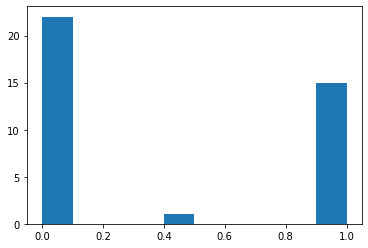

In [0]:
probs = lr_under.predict_proba(X_test)
prob_true = probs[::,1]
plt.hist(prob_true)

In [0]:
print("Training:", lr_under.score(X_under, y_under))
print("Test set:", lr_under.score(X_test, y_test))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_und))
print("Precision:", metrics.precision_score(y_test, y_pred_und))
print("Recall:", metrics.recall_score(y_test, y_pred_und))

Training: 1.0
Test set: 0.7105263157894737
Accuracy: 0.7105263157894737
Precision: 0.4666666666666667
Recall: 0.7


In [0]:
lr_und_cm = metrics.confusion_matrix(y_test, y_pred_und)
lr_und_cm

array([[20,  8],
       [ 3,  7]])

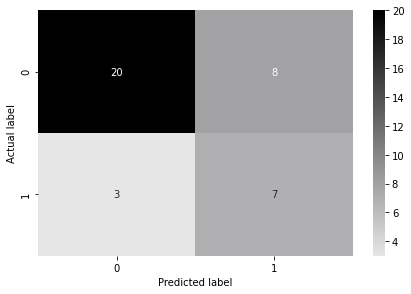

In [0]:
# name  of classes
class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
a = sns.heatmap(pd.DataFrame(lr_und_cm), annot=True, fmt='g', cmap=cmap)
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label',)
plt.show()

### Logistic Regression (oversampled)

In [0]:
lr_over = LogisticRegression(solver='liblinear', C=.05)
lr_over.fit(X_over, y_over)
lr_over_scores = cross_val_score(lr_over, X_over, y_over, cv=5, scoring='roc_auc')
y_pred_over = lr_over.predict(X_test)

In [0]:
print("Training:", lr_over.score(X_over, y_over))
print("Test set:", lr_over.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_over))
print("Precision:",metrics.precision_score(y_test, y_pred_over))
print("Recall:",metrics.recall_score(y_test, y_pred_over))

Training: 1.0
Test set: 0.8157894736842105
Accuracy: 0.8157894736842105
Precision: 0.6363636363636364
Recall: 0.7


In [0]:
lr_ov_cm = metrics.confusion_matrix(y_test, y_pred_over)
lr_ov_cm

array([[24,  4],
       [ 3,  7]])

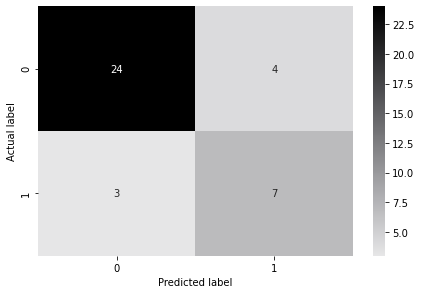

In [0]:
# name  of classes
class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
a = sns.heatmap(pd.DataFrame(lr_ov_cm), annot=True, fmt='g', cmap=cmap)
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label',)
plt.show()

### Random Forest (Undersampled)

In [0]:
# Baseline RF w/out under or over sampling
rfc_und = RandomForestClassifier()
rfc_und.fit(X_under, y_under)
rfc_und_scores = cross_val_score(rfc_und, X_under, y_under, cv=5, scoring='roc_auc')
y_pred_rfc_und = rfc_und.predict(X_test)

In [0]:
print("Training:", rfc_und.score(X_under, y_under))
print("Test set:", rfc_und.score(X_test, y_test))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rfc_und))
print("Precision:", metrics.precision_score(y_test, y_pred_rfc_und))
print("Recall:", metrics.recall_score(y_test, y_pred_rfc_und))

Training: 1.0
Test set: 0.868421052631579
Accuracy: 0.868421052631579
Precision: 0.7272727272727273
Recall: 0.8


In [0]:
rfc_und_cm = metrics.confusion_matrix(y_test, y_pred_rfc_und)
rfc_und_cm

array([[25,  3],
       [ 2,  8]])

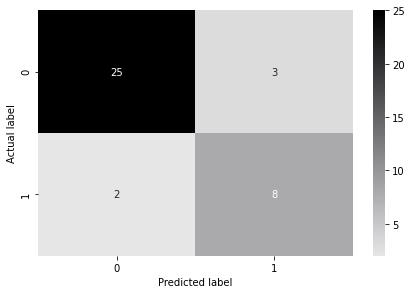

In [0]:
# name  of classes
class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
a = sns.heatmap(pd.DataFrame(rfc_und_cm), annot=True, fmt='g', cmap=cmap)
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label',)
plt.show()

### Random Forest (Oversampled)

In [0]:
# Baseline RF w/out under or over sampling
rfc_ov = RandomForestClassifier()
rfc_ov.fit(X_over, y_over)
rfc_ov_scores = cross_val_score(rfc_ov, X_over, y_over, cv=5, scoring='roc_auc')
y_pred_rfc_ov = rfc_ov.predict(X_test)

In [0]:
print("Training:", rfc_ov.score(X_over, y_over))
print("Test set:", rfc_ov.score(X_test, y_test))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rfc_ov))
print("Precision:", metrics.precision_score(y_test, y_pred_rfc_ov))
print("Recall:", metrics.recall_score(y_test, y_pred_rfc_ov))

Training: 1.0
Test set: 0.9210526315789473
Accuracy: 0.9210526315789473
Precision: 1.0
Recall: 0.7


In [0]:
rfc_ov_cm = metrics.confusion_matrix(y_test, y_pred_rfc_ov)
rfc_ov_cm

array([[28,  0],
       [ 3,  7]])

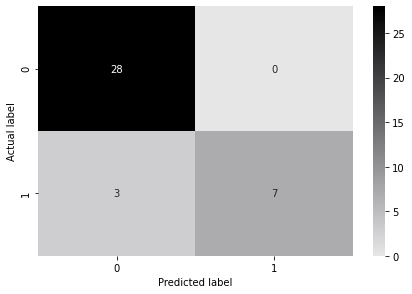

In [0]:
# name  of classes
class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
a = sns.heatmap(pd.DataFrame(rfc_ov_cm), annot=True, fmt='g', cmap=cmap)
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label',)
plt.show()

### AdaBoost (Oversampled)

In [0]:
# Baseline RF w/out under or over sampling
ada_ov = AdaBoostClassifier()
ada_ov.fit(X_over, y_over)
ada_ov_scores = cross_val_score(ada_ov, X_over, y_over, cv=5, scoring='roc_auc')
y_pred_ada_ov = ada_ov.predict(X_test)

In [0]:
print("Training:", ada_ov.score(X_over, y_over))
print("Test set:", ada_ov.score(X_test, y_test))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_ada_ov))
print("Precision:", metrics.precision_score(y_test, y_pred_ada_ov))
print("Recall:", metrics.recall_score(y_test, y_pred_ada_ov))

Training: 1.0
Test set: 0.9210526315789473
Accuracy: 0.9210526315789473
Precision: 1.0
Recall: 0.7


In [0]:
ada_ov_cm = metrics.confusion_matrix(y_test, y_pred_ada_ov)
ada_ov_cm

array([[28,  0],
       [ 3,  7]])

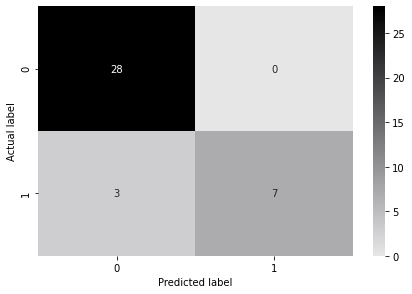

In [0]:
# name  of classes
class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
a = sns.heatmap(pd.DataFrame(ada_ov_cm), annot=True, fmt='g', cmap=cmap)
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label',)
plt.show()

# Pipeline (Undersampled)

In [0]:
classifiers = [
    KNeighborsClassifier(),
    SVC(),
    NuSVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LinearSVC(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(solver='liblinear'),
    SGDClassifier()
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_under, y_under)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
model score: 0.868
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
model score: 0.789
NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)
model score: 0.816
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                  

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
model score: 0.737
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model score: 0.842
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
model score: 0.816
GradientBoostingClassifier(ccp_

# Pipeline (Oversampled)

In [0]:
classifiers = [
    KNeighborsClassifier(),
    SVC(),
    NuSVC(),
    DecisionTreeClassifier(),
    LinearSVC(),
    AdaBoostClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(solver='liblinear'),
    SGDClassifier()
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_over, y_over)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
model score: 0.816
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
model score: 0.789
NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)
model score: 0.789
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                  

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
model score: 0.921
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model score: 0.921
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_

# PCA

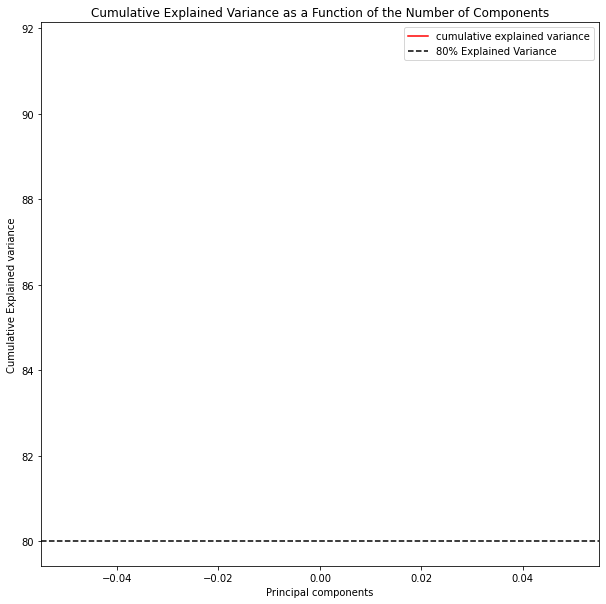

In [0]:
#Using elbow-plot variance/dimensions
pca = PCA(.80)
pca.fit(X_over)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 80, color='k', linestyle='--', label = '80% Explained Variance')
plt.legend(loc='best')

In [0]:
pca = PCA(.80) 
pca.fit(X_over)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [0]:
pca.n_components_

1

In [0]:
X_ov_pca, y_ov_pca = RandomOverSampler(random_state=89).fit_sample(X_train_pca, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Pipeline (PCA, oversampled)

In [0]:
shops_w_featsclassifiers = [
    KNeighborsClassifier(),
    SVC(),
    NuSVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LinearSVC(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(solver='liblinear'),
    SGDClassifier()
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_ov_pca, y_ov_pca)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test_pca, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
model score: 0.500
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
model score: 0.763
NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)
model score: 0.658
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                  

# Feature Analysis

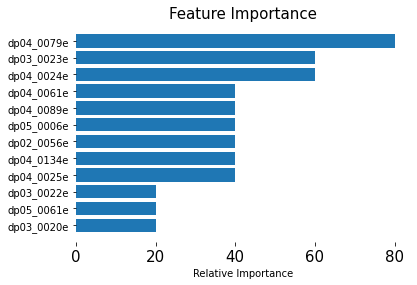

In [0]:
# checking which are the most important features
feature_importance = ada_ov.fit(X_over, y_over).feature_importances_
# feature_importance = rfc_ov.fit(X_over, y_over).feature_importances_

# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[-13:-1:1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance', fontsize=15)
plt.tick_params(axis='x', which='major', labelsize=15)
sns.despine(left=True, bottom=True)
plt.show()

In [0]:
features_only = []
for i in X.columns[sorted_idx]:
  print(i)
  features_only.append(i)

dp03_0020e
dp05_0061e
dp03_0022e
dp04_0025e
dp04_0134e
dp02_0056e
dp05_0006e
dp04_0089e
dp04_0061e
dp04_0024e
dp03_0023e
dp04_0079e


In [0]:
features_only

['dp03_0020e',
 'dp05_0061e',
 'dp03_0022e',
 'dp04_0025e',
 'dp04_0134e',
 'dp02_0056e',
 'dp05_0006e',
 'dp04_0089e',
 'dp04_0061e',
 'dp04_0024e',
 'dp03_0023e',
 'dp04_0079e']

In [0]:
codes = ['boba_shop', 'tract', 'county']
for i in X.columns[sorted_idx]:
  print(i)
  codes.append(i)

dp03_0020e
dp05_0061e
dp03_0022e
dp04_0025e
dp04_0134e
dp02_0056e
dp05_0006e
dp04_0089e
dp04_0061e
dp04_0024e
dp03_0023e
dp04_0079e


In [0]:
codes

['boba_shop',
 'tract',
 'county',
 'dp03_0020e',
 'dp05_0061e',
 'dp03_0022e',
 'dp04_0025e',
 'dp04_0134e',
 'dp02_0056e',
 'dp05_0006e',
 'dp04_0089e',
 'dp04_0061e',
 'dp04_0024e',
 'dp03_0023e',
 'dp04_0079e']

In [0]:
imp_features = ny_df[codes]

In [0]:
imp_features.head()

,boba_shop,tract,county,dp03_0020e,dp05_0061e,dp03_0022e,dp04_0025e,dp04_0134e,dp02_0056e,dp05_0006e,dp04_0089e,dp04_0061e,dp04_0024e,dp03_0023e,dp04_0079e
0,1,11,Kings County,8.0,29.0,145.0,0.0,3042.0,0.0,10.0,1420500.0,0.0,0.0,29.0,38.0
1,1,49,Kings County,29.0,100.0,91.0,0.0,2544.0,69.0,100.0,1247900.0,0.0,12.0,110.0,16.0
2,1,76,Kings County,105.0,9.0,393.0,113.0,1465.0,232.0,362.0,754700.0,5.0,74.0,80.0,150.0
3,1,84,Kings County,99.0,0.0,151.0,117.0,1327.0,162.0,290.0,785200.0,0.0,71.0,115.0,230.0
4,1,92,Kings County,67.0,9.0,262.0,72.0,1278.0,420.0,500.0,593200.0,0.0,100.0,129.0,150.0


In [0]:
codes_str = str(codes[3:]).strip('[]').strip('"')

In [0]:
codes_str

"'dp03_0020e', 'dp05_0061e', 'dp03_0022e', 'dp04_0025e', 'dp04_0134e', 'dp02_0056e', 'dp05_0006e', 'dp04_0089e', 'dp04_0061e', 'dp04_0024e', 'dp03_0023e', 'dp04_0079e'"

In [0]:
query = 'select distinct id, def from defs where id in (' + codes_str + ')'

In [0]:
query

"select distinct id, def from defs where id in ('dp03_0020e', 'dp05_0061e', 'dp03_0022e', 'dp04_0025e', 'dp04_0134e', 'dp02_0056e', 'dp05_0006e', 'dp04_0089e', 'dp04_0061e', 'dp04_0024e', 'dp03_0023e', 'dp04_0079e')"

In [0]:
code2def = pd.read_sql(query, con=engine)

In [0]:
code2def

,id,def
0,dp02_0056e,"Estimate, SCHOOL ENROLLMENT, Population 3 year..."
1,dp03_0020e,"Estimate, COMMUTING TO WORK, Workers 16 years ..."
2,dp03_0022e,"Estimate, COMMUTING TO WORK, Workers 16 years ..."
3,dp03_0023e,"Estimate, COMMUTING TO WORK, Workers 16 years ..."
4,dp04_0024e,"Estimate, YEAR STRUCTURE BUILT, Total housing ..."
5,dp04_0025e,"Estimate, YEAR STRUCTURE BUILT, Total housing ..."
6,dp04_0061e,"Estimate, VEHICLES AVAILABLE, Occupied housing..."
7,dp04_0079e,"Estimate, OCCUPANTS PER ROOM, Occupied housing..."
8,dp04_0089e,"Estimate, VALUE, Owner-occupied units, Median ..."
9,dp04_0134e,"Estimate, GROSS RENT, Occupied units paying re..."


In [0]:
code_defs = dict(zip(code2def['id'], code2def['def']))

In [0]:
code_defs

{'dp02_0056e': 'Estimate, SCHOOL ENROLLMENT, Population 3 years and over enrolled in school, High school (grades 9-12)',
 'dp03_0020e': 'Estimate, COMMUTING TO WORK, Workers 16 years and over, Car, truck, or van -- carpooled',
 'dp03_0022e': 'Estimate, COMMUTING TO WORK, Workers 16 years and over, Walked',
 'dp03_0023e': 'Estimate, COMMUTING TO WORK, Workers 16 years and over, Other means',
 'dp04_0024e': 'Estimate, YEAR STRUCTURE BUILT, Total housing units, Built 1950 to 1959',
 'dp04_0025e': 'Estimate, YEAR STRUCTURE BUILT, Total housing units, Built 1940 to 1949',
 'dp04_0061e': 'Estimate, VEHICLES AVAILABLE, Occupied housing units, 3 or more vehicles available',
 'dp04_0079e': 'Estimate, OCCUPANTS PER ROOM, Occupied housing units, 1.51 or more',
 'dp04_0089e': 'Estimate, VALUE, Owner-occupied units, Median (dollars)',
 'dp04_0134e': 'Estimate, GROSS RENT, Occupied units paying rent, Median (dollars)',
 'dp05_0006e': 'Estimate, SEX AND AGE, Total population, 5 to 9 years',
 'dp05_00

In [0]:
imp_features.rename(columns=code_defs, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [0]:
imp_features.describe()

,boba_shop,"Estimate, COMMUTING TO WORK, Workers 16 years and over, Car, truck, or van -- carpooled","Estimate, RACE, Total population, Two or more races, White and Asian","Estimate, COMMUTING TO WORK, Workers 16 years and over, Walked","Estimate, YEAR STRUCTURE BUILT, Total housing units, Built 1940 to 1949","Estimate, GROSS RENT, Occupied units paying rent, Median (dollars)","Estimate, SCHOOL ENROLLMENT, Population 3 years and over enrolled in school, High school (grades 9-12)","Estimate, SEX AND AGE, Total population, 5 to 9 years","Estimate, VALUE, Owner-occupied units, Median (dollars)","Estimate, VEHICLES AVAILABLE, Occupied housing units, 3 or more vehicles available","Estimate, YEAR STRUCTURE BUILT, Total housing units, Built 1950 to 1959","Estimate, COMMUTING TO WORK, Workers 16 years and over, Other means","Estimate, OCCUPANTS PER ROOM, Occupied housing units, 1.51 or more"
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,1.240000e+02,124.000000,124.000000,124.000000,124.000000
mean,0.250000,173.129032,31.911290,139.322581,234.000000,1770.903226,180.620968,226.548387,6.047444e+05,169.500000,418.443548,35.637097,29.459677
std,0.434769,136.981927,48.470427,235.171536,229.250316,685.367084,123.257058,164.283730,3.417507e+05,165.055965,384.872406,53.311225,45.766889
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,70.250000,0.000000,25.500000,98.500000,1432.750000,98.000000,89.750000,3.423000e+05,29.000000,137.000000,0.000000,0.000000
50%,0.000000,137.000000,15.000000,57.500000,184.500000,1713.000000,158.500000,197.500000,5.914000e+05,115.000000,304.000000,18.500000,12.500000
75%,0.250000,248.000000,43.500000,126.500000,293.750000,1990.250000,235.000000,332.250000,7.754500e+05,237.750000,540.250000,50.000000,28.000000
max,1.000000,569.000000,268.000000,1479.000000,1621.000000,3500.000000,671.000000,702.000000,2.000000e+06,635.000000,1520.000000,395.000000,230.000000


In [0]:
shops_w_feats = imp_features.loc[imp_features['boba_shop'] == 1].reset_index()
shops_w_feats

,index,boba_shop,tract,county,"Estimate, COMMUTING TO WORK, Workers 16 years and over, Car, truck, or van -- carpooled","Estimate, RACE, Total population, Two or more races, White and Asian","Estimate, COMMUTING TO WORK, Workers 16 years and over, Walked","Estimate, YEAR STRUCTURE BUILT, Total housing units, Built 1940 to 1949","Estimate, GROSS RENT, Occupied units paying rent, Median (dollars)","Estimate, SCHOOL ENROLLMENT, Population 3 years and over enrolled in school, High school (grades 9-12)","Estimate, SEX AND AGE, Total population, 5 to 9 years","Estimate, VALUE, Owner-occupied units, Median (dollars)","Estimate, VEHICLES AVAILABLE, Occupied housing units, 3 or more vehicles available","Estimate, YEAR STRUCTURE BUILT, Total housing units, Built 1950 to 1959","Estimate, COMMUTING TO WORK, Workers 16 years and over, Other means","Estimate, OCCUPANTS PER ROOM, Occupied housing units, 1.51 or more"
0,0,1,11,Kings County,8.0,29.0,145.0,0.0,3042.0,0.0,10.0,1420500.0,0.0,0.0,29.0,38.0
1,1,1,49,Kings County,29.0,100.0,91.0,0.0,2544.0,69.0,100.0,1247900.0,0.0,12.0,110.0,16.0
2,2,1,76,Kings County,105.0,9.0,393.0,113.0,1465.0,232.0,362.0,754700.0,5.0,74.0,80.0,150.0
3,3,1,84,Kings County,99.0,0.0,151.0,117.0,1327.0,162.0,290.0,785200.0,0.0,71.0,115.0,230.0
4,4,1,92,Kings County,67.0,9.0,262.0,72.0,1278.0,420.0,500.0,593200.0,0.0,100.0,129.0,150.0
5,5,1,104,Kings County,362.0,28.0,555.0,157.0,1289.0,189.0,319.0,899300.0,19.0,57.0,0.0,140.0
6,6,1,120,Kings County,13.0,0.0,88.0,29.0,1375.0,45.0,83.0,847600.0,5.0,39.0,7.0,28.0
7,7,1,195,Kings County,89.0,58.0,192.0,840.0,1726.0,64.0,89.0,593900.0,0.0,156.0,158.0,19.0
8,8,1,554,Kings County,75.0,268.0,160.0,307.0,1440.0,215.0,294.0,477300.0,0.0,158.0,144.0,113.0
9,9,1,774,Kings County,56.0,48.0,80.0,188.0,1419.0,315.0,252.0,734400.0,54.0,152.0,47.0,80.0


In [0]:
shops_w_feats.describe()

,index,boba_shop,"Estimate, COMMUTING TO WORK, Workers 16 years and over, Car, truck, or van -- carpooled","Estimate, RACE, Total population, Two or more races, White and Asian","Estimate, COMMUTING TO WORK, Workers 16 years and over, Walked","Estimate, YEAR STRUCTURE BUILT, Total housing units, Built 1940 to 1949","Estimate, GROSS RENT, Occupied units paying rent, Median (dollars)","Estimate, SCHOOL ENROLLMENT, Population 3 years and over enrolled in school, High school (grades 9-12)","Estimate, SEX AND AGE, Total population, 5 to 9 years","Estimate, VALUE, Owner-occupied units, Median (dollars)","Estimate, VEHICLES AVAILABLE, Occupied housing units, 3 or more vehicles available","Estimate, YEAR STRUCTURE BUILT, Total housing units, Built 1950 to 1959","Estimate, COMMUTING TO WORK, Workers 16 years and over, Other means","Estimate, OCCUPANTS PER ROOM, Occupied housing units, 1.51 or more"
count,31.000000,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,3.100000e+01,31.000000,31.000000,31.000000,31.000000
mean,47.548387,1.0,91.709677,51.193548,373.322581,136.483871,1959.612903,119.451613,158.709677,7.948935e+05,22.645161,134.677419,74.129032,66.354839
std,31.977949,0.0,110.093655,70.344590,368.280182,168.130876,769.363533,105.542358,128.018539,4.852222e+05,37.828163,142.120931,79.128057,62.527087
min,0.000000,1.0,0.000000,0.000000,44.000000,0.000000,935.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,4.000000
25%,7.500000,1.0,17.500000,2.000000,89.500000,58.500000,1397.000000,54.500000,57.000000,4.872000e+05,0.000000,35.000000,22.500000,19.000000
50%,62.000000,1.0,62.000000,25.000000,196.000000,103.000000,1577.000000,100.000000,122.000000,7.344000e+05,10.000000,100.000000,54.000000,38.000000
75%,69.500000,1.0,102.500000,71.500000,567.500000,156.500000,2571.500000,153.000000,261.000000,9.773000e+05,24.500000,157.000000,112.500000,124.500000
max,113.000000,1.0,484.000000,268.000000,1479.000000,840.000000,3500.000000,420.000000,500.000000,2.000000e+06,181.000000,529.000000,395.000000,230.000000


#Zip Index + Column Names

In [0]:
key = np.arange(0,502)
values = ny_df.columns.to_list()
values = values[4:]

In [0]:
index2colnames = dict(zip(key, values))

In [0]:
index2colnames

{0: 'dp05_0032e',
 1: 'dp05_0033e',
 2: 'dp05_0034e',
 3: 'dp05_0035e',
 4: 'dp05_0036e',
 5: 'dp05_0037e',
 6: 'dp05_0038e',
 7: 'dp05_0039e',
 8: 'dp05_0040e',
 9: 'dp05_0041e',
 10: 'dp05_0042e',
 11: 'dp05_0043e',
 12: 'dp05_0044e',
 13: 'dp05_0045e',
 14: 'dp05_0046e',
 15: 'dp05_0047e',
 16: 'dp05_0048e',
 17: 'dp05_0049e',
 18: 'dp05_0050e',
 19: 'dp05_0051e',
 20: 'dp05_0052e',
 21: 'dp05_0053e',
 22: 'dp05_0054e',
 23: 'dp05_0055e',
 24: 'dp05_0056e',
 25: 'dp05_0057e',
 26: 'dp05_0058e',
 27: 'dp05_0059e',
 28: 'dp05_0060e',
 29: 'dp05_0061e',
 30: 'dp05_0062e',
 31: 'dp05_0063e',
 32: 'dp05_0064e',
 33: 'dp05_0065e',
 34: 'dp05_0066e',
 35: 'dp05_0067e',
 36: 'dp05_0068e',
 37: 'dp05_0069e',
 38: 'dp05_0070e',
 39: 'dp05_0071e',
 40: 'dp05_0072e',
 41: 'dp05_0073e',
 42: 'dp05_0074e',
 43: 'dp05_0075e',
 44: 'dp05_0076e',
 45: 'dp05_0077e',
 46: 'dp05_0078e',
 47: 'dp05_0079e',
 48: 'dp05_0080e',
 49: 'dp05_0081e',
 50: 'dp05_0082e',
 51: 'dp05_0083e',
 52: 'dp05_0084e',
 53

# Zip Index + Tracts

In [0]:
ny_df = ny_df.fillna(0)

In [0]:
index = list(ny_df.index)
tracts = list(ny_df['tract'])
index2tract =  dict(zip(index, tracts))

In [0]:
index2tract

{0: '11',
 1: '49',
 2: '76',
 3: '84',
 4: '92',
 5: '104',
 6: '120',
 7: '195',
 8: '554',
 9: '774',
 10: '3003',
 11: '3004',
 12: '3005',
 13: '3006',
 14: '3007',
 15: '3009',
 16: '3018',
 17: '3034',
 18: '3035',
 19: '3036',
 20: '3037',
 21: '3038',
 22: '3039',
 23: '3040.01',
 24: '3040.02',
 25: '3041',
 26: '3042.02',
 27: '3042.03',
 28: '3042.04',
 29: '4064',
 30: '4065.01',
 31: '4066',
 32: '4067.01',
 33: '4067.02',
 34: '4068.01',
 35: '4068.02',
 36: '4069',
 37: '4070',
 38: '4071.01',
 39: '4071.02',
 40: '4072.01',
 41: '4072.03',
 42: '4072.04',
 43: '4073.01',
 44: '4073.02',
 45: '4074.01',
 46: '4074.02',
 47: '4075.01',
 48: '4075.02',
 49: '4076',
 50: '4077',
 51: '4078.01',
 52: '4078.02',
 53: '4079',
 54: '4080',
 55: '4081',
 56: '4082',
 57: '9801',
 58: '8',
 59: '15.02',
 60: '49',
 61: '76',
 62: '84',
 63: '92',
 64: '104',
 65: '120',
 66: '125',
 67: '195',
 68: '8',
 69: '104',
 70: '120',
 71: '125',
 72: '554',
 73: '683',
 74: '717.02',
 

# Add predictions back to test set

In [0]:
abc = y_pred_proba
test = pd.DataFrame(X_test)

In [0]:
test.rename(columns=index2colnames, inplace=True)

In [0]:
test['class_0'] = abc[:,0].round(5)
test['class_1'] = abc[:,1].round(5)
test['target'] = y_test

In [0]:
# test['class_0'].round(5)

In [0]:
test

,dp05_0032e,dp05_0033e,dp05_0034e,dp05_0035e,dp05_0036e,dp05_0037e,dp05_0038e,dp05_0039e,dp05_0040e,dp05_0041e,dp05_0042e,dp05_0043e,dp05_0044e,dp05_0045e,dp05_0046e,dp05_0047e,dp05_0048e,dp05_0049e,dp05_0050e,dp05_0051e,dp05_0052e,dp05_0053e,dp05_0054e,dp05_0055e,dp05_0056e,dp05_0057e,dp05_0058e,dp05_0059e,dp05_0060e,dp05_0061e,dp05_0062e,dp05_0063e,dp05_0064e,dp05_0065e,dp05_0066e,dp05_0067e,dp05_0068e,dp05_0069e,dp05_0070e,dp05_0071e,...,dp02_0116e,dp02_0117e,dp02_0118e,dp02_0119e,dp02_0120e,dp02_0121e,dp02_0122e,dp02_0123e,dp02_0124e,dp02_0125e,dp02_0126e,dp02_0127e,dp02_0128e,dp02_0129e,dp02_0130e,dp02_0131e,dp02_0132e,dp02_0133e,dp02_0134e,dp02_0135e,dp02_0136e,dp02_0137e,dp02_0138e,dp02_0139e,dp02_0140e,dp02_0141e,dp02_0142e,dp02_0143e,dp02_0144e,dp02_0145e,dp02_0146e,dp02_0147e,dp02_0148e,dp02_0149e,dp02_0150e,dp02_0151e,dp02_0152e,class_0,class_1,target
71,65.7,1777.0,1750.0,27.0,1750.0,1274.0,81.0,0.0,0.0,0.0,0.0,0.0,212.0,71.0,37.0,46.0,0.0,15.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,183.0,27.0,10.0,0.0,17.0,0.0,1777.0,1301.0,91.0,0.0,229.0,0.0,183.0,1777.0,423.0,...,541.0,244.0,56.0,26.0,69.0,34.0,1777.0,128.0,55.0,34.0,5.0,0.0,41.0,12.0,5.0,75.0,237.0,21.0,57.0,167.0,9.0,6.0,22.0,5.0,8.0,5.0,4.0,0.0,18.0,5.0,0.0,0.0,5.0,0.0,695.0,666.0,627.0,0.01817,0.98183,1
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50000,0.50000,0
51,73.8,5404.0,5386.0,18.0,5386.0,3940.0,253.0,0.0,0.0,0.0,0.0,0.0,905.0,455.0,91.0,266.0,0.0,46.0,5.0,42.0,0.0,0.0,0.0,0.0,0.0,288.0,18.0,0.0,0.0,18.0,0.0,5404.0,3958.0,253.0,0.0,923.0,0.0,288.0,5404.0,688.0,...,722.0,231.0,328.0,170.0,173.0,38.0,5404.0,275.0,21.0,44.0,10.0,23.0,102.0,47.0,0.0,359.0,102.0,59.0,701.0,1184.0,29.0,17.0,175.0,44.0,156.0,11.0,14.0,0.0,0.0,17.0,43.0,53.0,9.0,40.0,1725.0,1590.0,1590.0,1.00000,0.00000,0
91,89.7,3933.0,3857.0,76.0,3857.0,2618.0,104.0,0.0,0.0,0.0,0.0,0.0,1093.0,59.0,761.0,0.0,0.0,210.0,11.0,52.0,0.0,0.0,0.0,0.0,0.0,42.0,76.0,17.0,0.0,43.0,0.0,3933.0,2678.0,129.0,0.0,1152.0,0.0,50.0,3933.0,370.0,...,488.0,151.0,718.0,444.0,88.0,13.0,3933.0,125.0,9.0,0.0,0.0,0.0,65.0,17.0,9.0,270.0,172.0,41.0,303.0,396.0,18.0,0.0,340.0,4.0,221.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,139.0,1963.0,1790.0,1702.0,0.99879,0.00121,0
72,107.5,2361.0,2348.0,13.0,2348.0,676.0,380.0,17.0,0.0,0.0,0.0,0.0,884.0,469.0,114.0,112.0,0.0,0.0,0.0,189.0,20.0,0.0,0.0,0.0,20.0,371.0,13.0,6.0,0.0,0.0,0.0,2361.0,682.0,393.0,17.0,884.0,20.0,378.0,2361.0,637.0,...,531.0,253.0,204.0,116.0,79.0,73.0,2361.0,241.0,0.0,0.0,0.0,0.0,15.0,6.0,0.0,68.0,10.0,4.0,24.0,60.0,0.0,0.0,19.0,5.0,6.0,9.0,4.0,0.0,11.0,0.0,0.0,12.0,0.0,247.0,756.0,617.0,609.0,1.00000,0.00000,1
99,96.5,1745.0,1685.0,60.0,1685.0,778.0,3.0,0.0,0.0,0.0,0.0,0.0,904.0,50.0,744.0,38.0,0.0,45.0,3.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,54.0,0.0,1745.0,838.0,3.0,0.0,958.0,0.0,6.0,1745.0,105.0,...,192.0,52.0,764.0,435.0,0.0,0.0,1745.0,55.0,0.0,0.0,0.0,0.0,29.0,30.0,0.0,43.0,99.0,10.0,144.0,184.0,0.0,0.0,43.0,71.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,576.0,530.0,524.0,1.00000,0.00000,0
65,69.0,3056.0,3056.0,0.0,3056.0,2776.0,216.0,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,34.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,3056.0,2776.0,216.0,0.0,53.0,0.0,11.0,3056.0,173.0,...,342.0,57.0,73.0,19.0,128.0,29.0,3056.0,245.0,15.0,3.0,0.0,0.0,186.0,55.0,11.0,371.0,45.0,71.0,386.0,197.0,26.0,33.0,186.0,0.0,430.0,10.0,15.0,0.0,15.0,72.0,90.0,23.0,12.0,43.0,1653.0,1569.0,1528.0,0.00000,1.00000,1
32,82.0,2813.0,2645.0,168.0,2645.0,676.0,868.0,0.0,0.0,0.0,0.0,0.0,97.0,33.0,0.0,48.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1004.0,168.0,8.0,0.0,0.0,11.0,2813.0,727.0,947.0,81.0,189.0,0.0,1100.0,2813.0,1445.0,...,60.0,24.0,33.0,0.0,0.0,0.0,2813.0,93.0,0.0,0.0,0.0,0.0,27.0,5.0,0.0,112.0,0.0,0.0,91.0,

In [0]:
test['tract'] = test.index.to_series().map(index2tract)

In [0]:
# cols = test.columns.to_list()
# cols.insert(0, cols.pop(cols.index('target')))
# test = test.reindex(columns = cols)

# cols.insert(1, cols.pop(cols.index('class_0')))
# test = test.reindex(columns = cols)

# cols.insert(2, cols.pop(cols.index('class_1')))
# test = test.reindex(columns = cols)

cols = test.columns.to_list()
cols.insert(0, cols.pop(cols.index('target')))
cols.insert(1, cols.pop(cols.index('class_0')))
cols.insert(2, cols.pop(cols.index('class_1')))
cols.insert(3, cols.pop(cols.index('tract')))
test = test.reindex(columns = cols)

In [0]:
features_only

['dp03_0020e',
 'dp05_0061e',
 'dp03_0022e',
 'dp04_0025e',
 'dp04_0134e',
 'dp02_0056e',
 'dp05_0006e',
 'dp04_0089e',
 'dp04_0061e',
 'dp04_0024e',
 'dp03_0023e',
 'dp04_0079e']

In [0]:
codes_str2 = str(features_only).strip('[]').strip('"')

In [0]:
codes_str2

"'dp03_0020e', 'dp05_0061e', 'dp03_0022e', 'dp04_0025e', 'dp04_0134e', 'dp02_0056e', 'dp05_0006e', 'dp04_0089e', 'dp04_0061e', 'dp04_0024e', 'dp03_0023e', 'dp04_0079e'"

In [0]:
query2 = 'select distinct id, def from defs where id in (' + codes_str2 + ')'

In [0]:
query2

"select distinct id, def from defs where id in ('dp03_0020e', 'dp05_0061e', 'dp03_0022e', 'dp04_0025e', 'dp04_0134e', 'dp02_0056e', 'dp05_0006e', 'dp04_0089e', 'dp04_0061e', 'dp04_0024e', 'dp03_0023e', 'dp04_0079e')"

In [0]:
code2def_2 = pd.read_sql(query2, con=engine)

In [0]:
code2def_2

,id,def
0,dp02_0056e,"Estimate, SCHOOL ENROLLMENT, Population 3 year..."
1,dp03_0020e,"Estimate, COMMUTING TO WORK, Workers 16 years ..."
2,dp03_0022e,"Estimate, COMMUTING TO WORK, Workers 16 years ..."
3,dp03_0023e,"Estimate, COMMUTING TO WORK, Workers 16 years ..."
4,dp04_0024e,"Estimate, YEAR STRUCTURE BUILT, Total housing ..."
5,dp04_0025e,"Estimate, YEAR STRUCTURE BUILT, Total housing ..."
6,dp04_0061e,"Estimate, VEHICLES AVAILABLE, Occupied housing..."
7,dp04_0079e,"Estimate, OCCUPANTS PER ROOM, Occupied housing..."
8,dp04_0089e,"Estimate, VALUE, Owner-occupied units, Median ..."
9,dp04_0134e,"Estimate, GROSS RENT, Occupied units paying re..."


In [0]:
code_defs_2 = dict(zip(code2def['id'], code2def['def']))

In [0]:
code_defs_2

{'dp02_0056e': 'Estimate, SCHOOL ENROLLMENT, Population 3 years and over enrolled in school, High school (grades 9-12)',
 'dp03_0020e': 'Estimate, COMMUTING TO WORK, Workers 16 years and over, Car, truck, or van -- carpooled',
 'dp03_0022e': 'Estimate, COMMUTING TO WORK, Workers 16 years and over, Walked',
 'dp03_0023e': 'Estimate, COMMUTING TO WORK, Workers 16 years and over, Other means',
 'dp04_0024e': 'Estimate, YEAR STRUCTURE BUILT, Total housing units, Built 1950 to 1959',
 'dp04_0025e': 'Estimate, YEAR STRUCTURE BUILT, Total housing units, Built 1940 to 1949',
 'dp04_0061e': 'Estimate, VEHICLES AVAILABLE, Occupied housing units, 3 or more vehicles available',
 'dp04_0079e': 'Estimate, OCCUPANTS PER ROOM, Occupied housing units, 1.51 or more',
 'dp04_0089e': 'Estimate, VALUE, Owner-occupied units, Median (dollars)',
 'dp04_0134e': 'Estimate, GROSS RENT, Occupied units paying rent, Median (dollars)',
 'dp05_0006e': 'Estimate, SEX AND AGE, Total population, 5 to 9 years',
 'dp05_00

In [0]:
base1 = test.iloc[:,0:4]
base2 = test[features_only]

In [0]:
base2.rename(columns=code_defs_2, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [0]:
base2

,"Estimate, COMMUTING TO WORK, Workers 16 years and over, Car, truck, or van -- carpooled","Estimate, RACE, Total population, Two or more races, White and Asian","Estimate, COMMUTING TO WORK, Workers 16 years and over, Walked","Estimate, YEAR STRUCTURE BUILT, Total housing units, Built 1940 to 1949","Estimate, GROSS RENT, Occupied units paying rent, Median (dollars)","Estimate, SCHOOL ENROLLMENT, Population 3 years and over enrolled in school, High school (grades 9-12)","Estimate, SEX AND AGE, Total population, 5 to 9 years","Estimate, VALUE, Owner-occupied units, Median (dollars)","Estimate, VEHICLES AVAILABLE, Occupied housing units, 3 or more vehicles available","Estimate, YEAR STRUCTURE BUILT, Total housing units, Built 1950 to 1959","Estimate, COMMUTING TO WORK, Workers 16 years and over, Other means","Estimate, OCCUPANTS PER ROOM, Occupied housing units, 1.51 or more"
71,39.0,17.0,61.0,114.0,1738.0,72.0,22.0,813700.0,12.0,36.0,36.0,12.0
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,222.0,18.0,0.0,246.0,655.0,157.0,221.0,443400.0,521.0,1260.0,0.0,0.0
91,78.0,43.0,8.0,317.0,1567.0,182.0,86.0,225100.0,78.0,1269.0,45.0,7.0
72,100.0,0.0,60.0,184.0,1577.0,77.0,90.0,445300.0,62.0,177.0,7.0,4.0
99,88.0,54.0,34.0,184.0,1750.0,129.0,156.0,828400.0,117.0,204.0,0.0,0.0
65,10.0,0.0,503.0,135.0,2439.0,75.0,65.0,2000000.0,30.0,486.0,117.0,9.0
32,225.0,0.0,50.0,100.0,1440.0,147.0,243.0,287500.0,112.0,303.0,12.0,70.0
94,567.0,180.0,138.0,1621.0,1781.0,400.0,334.0,0.0,75.0,1231.0,0.0,150.0
73,41.0,4.0,134.0,135.0,1370.0,133.0,155.0,297200.0,18.0,414.0,59.0,16.0


In [0]:
base3 = pd.concat([base1, base2],axis=1)
base3

,target,class_0,class_1,tract,"Estimate, COMMUTING TO WORK, Workers 16 years and over, Car, truck, or van -- carpooled","Estimate, RACE, Total population, Two or more races, White and Asian","Estimate, COMMUTING TO WORK, Workers 16 years and over, Walked","Estimate, YEAR STRUCTURE BUILT, Total housing units, Built 1940 to 1949","Estimate, GROSS RENT, Occupied units paying rent, Median (dollars)","Estimate, SCHOOL ENROLLMENT, Population 3 years and over enrolled in school, High school (grades 9-12)","Estimate, SEX AND AGE, Total population, 5 to 9 years","Estimate, VALUE, Owner-occupied units, Median (dollars)","Estimate, VEHICLES AVAILABLE, Occupied housing units, 3 or more vehicles available","Estimate, YEAR STRUCTURE BUILT, Total housing units, Built 1950 to 1959","Estimate, COMMUTING TO WORK, Workers 16 years and over, Other means","Estimate, OCCUPANTS PER ROOM, Occupied housing units, 1.51 or more"
71,1,0.01817,0.98183,125,39.0,17.0,61.0,114.0,1738.0,72.0,22.0,813700.0,12.0,36.0,36.0,12.0
89,0,0.50000,0.50000,1283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,0,1.00000,0.00000,4078.01,222.0,18.0,0.0,246.0,655.0,157.0,221.0,443400.0,521.0,1260.0,0.0,0.0
91,0,0.99879,0.00121,1291.03,78.0,43.0,8.0,317.0,1567.0,182.0,86.0,225100.0,78.0,1269.0,45.0,7.0
72,1,1.00000,0.00000,554,100.0,0.0,60.0,184.0,1577.0,77.0,90.0,445300.0,62.0,177.0,7.0,4.0
99,0,1.00000,0.00000,1399,88.0,54.0,34.0,184.0,1750.0,129.0,156.0,828400.0,117.0,204.0,0.0,0.0
65,1,0.00000,1.00000,120,10.0,0.0,503.0,135.0,2439.0,75.0,65.0,2000000.0,30.0,486.0,117.0,9.0
32,0,0.86059,0.13941,4067.01,225.0,0.0,50.0,100.0,1440.0,147.0,243.0,287500.0,112.0,303.0,12.0,70.0
94,0,0.89785,0.10215,1347,567.0,180.0,138.0,1621.0,1781.0,400.0,334.0,0.0,75.0,1231.0,0.0,150.0
73,1,0.73988,0.26012,683,41.0,4.0,134.0,135.0,1370.0,133.0,155.0,297200.0,18.0,414.0,59.0,16.0


In [0]:
tract_latlong = pd.read_csv('/content/drive/My Drive/tract_lat_long.csv', dtype = str, names=['geo_id', 'lat', 'long', 'tract'])

In [0]:
tract_latlong

,geo_id,lat,long,tract
0,36047001100,40.6907,-73.9854,11
1,36047001100,40.6925,-73.991,11
2,36047001100,40.695,-73.9908,11
3,36047001100,40.6949,-73.9851,11
4,36047001100,40.6907,-73.9854,11
...,...,...,...,...
1079,36081068300,40.7343,-73.8646,683
1080,36081068300,40.7328,-73.8687,683
1081,36081068300,40.7348,-73.8747,683
1082,36081068300,40.7373,-73.8661,683


In [0]:
tract_latlong = tract_latlong.groupby('geo_id').first().reset_index()

In [0]:
tract_latlong['lat_long'] = tract_latlong['lat'].astype(str) + ', ' + tract_latlong['long'].astype(str)

In [0]:
tract_latlong

,geo_id,lat,long,tract,lat_long
0,36047001100,40.6907,-73.9854,11,"40.6907, -73.9854"
1,36047004900,40.6868,-73.9981,49,"40.6868, -73.9981"
2,36047007600,40.644,-74.0115,76,"40.644, -74.0115"
3,36047008400,40.654,-74.0074,84,"40.654, -74.0074"
4,36047009200,40.6461,-74.0021,92,"40.6461, -74.0021"
...,...,...,...,...,...
119,36081157101,40.7461,-73.7185,1571.01,"40.7461, -73.7185"
120,36081157102,40.7351,-73.7269,1571.02,"40.7351, -73.7269"
121,36081157901,40.7498,-73.7071,1579.01,"40.7498, -73.7071"
122,36081157902,40.7377,-73.7065,1579.02,"40.7377, -73.7065"


In [0]:
tract_list = list(tract_latlong['tract'])
tract_latlong = list(tract_latlong['lat_long'])

In [0]:
tract2latlong = dict(zip(tract_list, tract_latlong))
tract2latlong

{'104': '40.6854, -73.8295',
 '1085': '40.7743, -73.7915',
 '1093': '40.7717, -73.7626',
 '1097': '40.7729, -73.7703',
 '1099': '40.7667, -73.7827',
 '11': '40.6907, -73.9854',
 '1113': '40.764, -73.762',
 '1123': '40.7634, -73.7683',
 '1129': '40.7632, -73.7708',
 '1133': '40.7625, -73.7794',
 '1139': '40.7614, -73.7856',
 '1141': '40.7715, -73.7942',
 '1175': '40.7578, -73.7903',
 '1181': '40.7614, -73.7856',
 '120': '40.689, -73.8293',
 '125': '40.7697, -73.9164',
 '1283': '40.7392, -73.7636',
 '1291.02': '40.732, -73.7474',
 '1291.03': '40.7365, -73.7562',
 '1291.04': '40.7394, -73.7437',
 '1301': '40.7302, -73.7365',
 '1347': '40.7358, -73.7744',
 '1367': '40.74, -73.7609',
 '1377': '40.7504, -73.7522',
 '1385.01': '40.76, -73.7602',
 '1385.02': '40.7485, -73.7376',
 '1399': '40.7492, -73.757',
 '1403': '40.7468, -73.7651',
 '1409.01': '40.7487, -73.7783',
 '1409.02': '40.7485, -73.7793',
 '1429': '40.7532, -73.7815',
 '1435': '40.7553, -73.769',
 '1441': '40.7558, -73.7619',
 '14

In [0]:
# equiv = {7001:1, 8001:2, 9001:3}
# df = pd.DataFrame( {"A": [7001, 8001, 9001]} )
# df["B"] = df["A"].map(equiv)


base3['lat_long'] = base3['tract'].map(tract2latlong)

In [0]:
cols = base3.columns.to_list()
cols.insert(4, cols.pop(cols.index('lat_long')))
base3 = base3.reindex(columns = cols)

base3
base3.to_csv('/content/drive/My Drive/base3.csv')